# Collaborative Filtering based Recommendation System_Questios

## About Book Crossing Dataset
###This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

## Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

Execute the below cell to load the datasets

In [140]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\IP

## Q1 Check no.of records (shape) and features given in each dataset 

In [142]:
books.shape

(271360, 8)

In [143]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [144]:
users.shape

(278858, 3)

In [145]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [146]:
ratings.shape

(1149780, 3)

In [147]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Q2. Exploring books dataset - 1

In [148]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [149]:
books.describe().transpose()

,count,unique,top,freq
ISBN,271360,271360,0802131255,1
bookTitle,271360,242135,Selected Poems,27
bookAuthor,271359,102023,Agatha Christie,632
yearOfPublication,271360,202,2002,13903
publisher,271358,16807,Harlequin,7535
imageUrlS,271360,271044,http://images.amazon.com/images/P/044651862X.0...,2
imageUrlM,271360,271044,http://images.amazon.com/images/P/038524813X.0...,2
imageUrlL,271357,271041,http://images.amazon.com/images/P/006109207X.0...,2


In [150]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [151]:
# status distribution
#print(books.groupby('bookTitle').size())

### Drop last three columns containing image URLs which will not be required for analysis

In [152]:
books = books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [153]:
books.shape

(271360, 5)

In [154]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


### check the unique values of yearOfPublication

In [155]:
#List unique values in the books['yearOfPublication'] column
books.yearOfPublication.unique()
#books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Check the rows having 'DK Publishing Inc' as yearOfPublication and drop them
### Change the datatype of yearOfPublication to 'int'  -1

In [156]:
books.shape

(271360, 5)

In [157]:
books[(books.yearOfPublication=="DK Publishing Inc")]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [158]:
books = books[(books.yearOfPublication!="DK Publishing Inc")]

In [159]:
books.shape

(271358, 5)

In [160]:
books[(books.yearOfPublication=="Gallimard")]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [161]:
books = books[(books.yearOfPublication!="Gallimard")]

In [162]:
books.shape

(271357, 5)

In [163]:
books['yearOfPublication'] = books['yearOfPublication'].astype(int)

In [164]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

In [165]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

### Check for null vaules and impute them

In [166]:
# find missing value is any
books.isnull().sum()
#pd.isna(books).sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [167]:
books['bookAuthor'].mode()[0]

'Agatha Christie'

In [168]:
books['bookAuthor'] = books['bookAuthor'].replace(np.NaN, 'Other')

In [169]:
books['publisher'].mode()[0]

'Harlequin'

In [170]:
books['publisher'] = books['publisher'].replace(np.NaN, 'Other')

In [171]:
pd.isna(books).sum()

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

In [172]:
# Missig value inputation done successfully

In [173]:
pub = books['publisher'].unique()
pub

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

## Q3. Explore Users Dataset

### Age values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by mean and change the datatype to int - 1

In [174]:
users.shape

(278858, 3)

In [175]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [176]:
#users[(users.Age < 5) & (users.Age > 90)]

In [177]:
AgeMean = users['Age'].mean()
AgeMean = AgeMean.astype(int)
AgeMean

34

In [178]:
f = lambda x: AgeMean if x<5 else x
users['Age'] = users['Age'].map(f)

In [179]:
g = lambda x: AgeMean if x>90 else x
users['Age'] = users['Age'].map(g)

In [180]:
users['Age'] = users['Age'].replace(np.NaN, AgeMean)

In [181]:
users['Age'] = users['Age'].astype(int)

In [182]:
users['Age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int64)

In [183]:
users.dtypes

userID       int64
Location    object
Age          int32
dtype: object

## Q4. Explore ratings Dataset

In [184]:
ratings.shape

(1149780, 3)

In [185]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [186]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

In [187]:
ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [188]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
bookRating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [189]:
users.shape[0] * books.shape[0]

75670070306

### Ratings dataset should have books only which exist in our books dataset. - 1

In [190]:
ratings_modified = ratings[ratings.ISBN.isin(books.ISBN)]

In [191]:
ratings_modified.shape

(1031132, 3)

### Ratings dataset should have ratings from users which exist in users dataset.

In [192]:
ratings_modified = ratings_modified[ratings_modified.userID.isin(users.userID)]

In [193]:
ratings_modified.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s.

In [194]:
ratings_modified.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [195]:
ratings_modified = ratings_modified[ratings_modified['bookRating'] != 0]

In [196]:
ratings_modified.shape

(383841, 3)

### Find out which rating has been given highest number of times

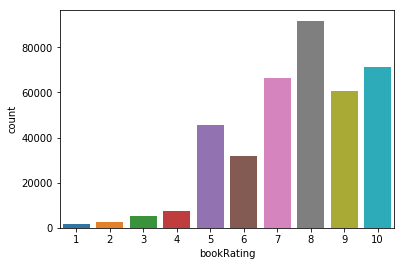

In [197]:
sns.countplot(data = ratings_modified, x= 'bookRating')
plt.show()

In [198]:
# 8th rating has been given highest number of times

## **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [201]:
Count100 = ratings_modified['userID'].value_counts()
ratings_modified100 =  ratings_modified[ratings_modified['userID'].isin(Count100[Count100 >= 100].index)]

In [206]:
Counts_100 = ratings_modified100['bookRating'].value_counts()
ratings_modified100 = ratings_modified100[ratings_modified100['bookRating'].isin(Counts_100[Counts_100 >= 100].index)]

In [207]:
ratings_modified100.shape

(103271, 3)

## Q5 Generating ratings matrix from explicit ratings table

#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [222]:
ratings_matrix = ratings_modified100.pivot(index = 'userID',columns = 'ISBN', values = 'bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
ratings_matrix.fillna(0, inplace=True)
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q6. Generate the predicted ratings using SVD with no.of singular values to be 50

In [231]:
print(ratings_modified.columns,ratings_modified.shape)

Index(['userID', 'ISBN', 'bookRating'], dtype='object') (383841, 3)


In [232]:
print(users.columns,users.shape)

Index(['userID', 'Location', 'Age'], dtype='object') (278858, 3)


In [233]:
print(books.columns,books.shape)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object') (271357, 5)


In [234]:
results=ratings_modified.merge(users,on='userID')

In [236]:
results=results.merge(books,on='ISBN')

In [241]:
results.isnull().sum()
#pd.isna(books).sum()

userID               0
ISBN                 0
bookRating           0
Location             0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

In [243]:
book_count = results["bookTitle"].value_counts(ascending=False)
pop_book = book_count.loc[book_count.values > 100].index
len(pop_book)

192

In [246]:
results_1 = results.loc[results.bookTitle.isin(pop_book)]
results_1.shape

(33641, 9)

In [253]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(results_1[['userID', 'ISBN', 'bookRating']], reader)

In [254]:
ratings.shape

(1149780, 3)

In [256]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [257]:
from surprise import SVD
from surprise import accuracy

In [258]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [259]:
test_pred = svd_model.test(testset)

In [260]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 3.2542


3.25419385810206

## Take a particular user_id

Lets find the recommendations for user with id 2110
Note: Execute the below cells to get the variables loaded

In [ ]:
userID = 2110

## Q7 Get the predicted ratings for userID 2110 and sort them in descending order

## Q8 Create a dataframe with name user_data containing userID 2110 explicitly interacted books

## Q9 Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

## Q10 Get top 10 recommendations for above given userID from the books not already rated by that user

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

## Q11 Read the Dataset `movies_metadata.csv`

## Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

## Q13  Lets drop the null values in `description` column

## Q14 Keep the first occurance and drop duplicates of each title in column `title`

## Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

## Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

## Q17  Create cosine similarity matrix

## Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

## Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.